In [23]:
# Marta Matice Valdman 1 - solution
# here is the original file in OneDrive
import scipy.io as io
import numpy as np


# from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

import numpy.linalg as la
import scipy.linalg as spla

import time
from multiprocessing import Pool, cpu_count
# from functools import partial
import collections
import os
import math
import matplotlib.pyplot as plt
n_processors = cpu_count()

# read file
file = 'mesh_2D_level1.mat'
coordinates = 'coords'
elements = 'elems'

mesh = mesh_coordinates = io.loadmat(file)


In [24]:
mesh_python = {"dim": mesh['mesh'][0][0][0],
                "nodes2coord": mesh['mesh'][0][0][1],
                "nodes2elems": mesh['mesh'][0][0][2],
                "elems2nodes": mesh['mesh'][0][0][3],
                "nodesBoundary": mesh['mesh'][0][0][4],
                "nodesInternal": mesh['mesh'][0][0][5],
                "nodesFree": mesh['mesh'][0][0][6],
                "grad1_elems": mesh['mesh'][0][0][7],
                "grad2_elems": mesh['mesh'][0][0][8],
                "areas": mesh['mesh'][0][0][9],
                "Hstr": mesh['mesh'][0][0][10]}


no.nodes: 21, no.elements: 24, dim: 2


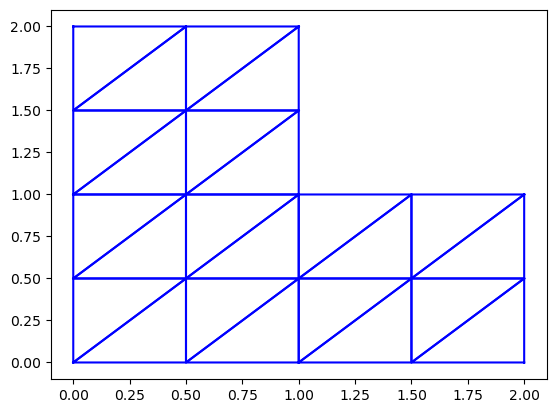

In [25]:
mesh_coordinates = mesh_python['nodes2coord']
mesh_elements = mesh_python['elems2nodes']
grad1_elements = mesh_python['grad1_elems']
grad2_elements = mesh_python['grad2_elems']
mesh_areas = mesh_python['areas']
n_n = mesh_coordinates.shape[0]        # number of nodes
n_e = mesh_elements.shape[0]           # number of element
dim = mesh_coordinates.shape[1]        # dimension
print(f'no.nodes: {n_n}, no.elements: {n_e}, dim: {dim}')

for el in range(0, n_e):
    nodes_local = mesh_elements[el]
    coordinates_local = mesh_coordinates[nodes_local - 1, :]
    coordinates_local_extended=np.vstack([coordinates_local, coordinates_local[0,:]])
    plt.plot(coordinates_local_extended[:,0],coordinates_local_extended[:,1],color='blue')
plt.show()


In [26]:

# print(mesh_coordinates.shape)
# print(mesh_elements.shape)

# coords 3D matice
# single process

start_time = time.time()

coords3D = np.zeros((dim, dim, n_e))
det_coords3D = np.zeros(n_e)
inv_coords3D = np.zeros((dim, dim, n_e))

for el in range(0, n_e):
    nodes_local = mesh_elements[el]
    coordinates_local = mesh_coordinates[nodes_local - 1, :]
    for comp in range(dim):
        coords3D[comp, :, el] = coordinates_local[comp + 1, :] - coordinates_local[0, :]
    det_coords3D[el] = np.linalg.det(coords3D[:, :, el])
    inv_coords3D[:, :, el] = np.linalg.inv(coords3D[:, :, el])

print(det_coords3D)
print(sum(det_coords3D) / 6)
print("--single process - %s seconds ---" % (time.time() - start_time))


[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
1.0
--single process - 0.0029993057250976562 seconds ---


In [27]:
# test function
def v_test(xy):
    return xy[:,0]-2*xy[:,1]

In [28]:
# gradient evaluation 
v=v_test(mesh_coordinates)
v_grad_elements=np.zeros(shape=(n_e, 2))
for el in range(0, n_e):
    nodes_local = mesh_elements[el]
    v_local=v[nodes_local-1]
    grad1_local=np.dot(v_local,grad1_elements[el])
    grad2_local=np.dot(v_local,grad2_elements[el])
    v_grad_elements[el,0]=grad1_local
    v_grad_elements[el,1]=grad2_local

In [29]:
p=2.8
density_elements=np.sum(np.power(np.abs(v_grad_elements),p),axis=1)
energy=np.dot(np.transpose(mesh_areas),density_elements)
energy



array([23.89321352])